Import all relevant libraries required

In [18]:
import csv
import random
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import data_file_reader
import matplotlib.pyplot as plt
import feature_extractor
import os

Training Block ----

Read the training data from the Training CSV File & Seperate Features and labels for training

In [2]:
filename='features_train.csv'
data,features,labels=data_file_reader.file_reader(filename,'train')

Define the classifiers used

In [3]:
svc=SVC(kernel='linear', C=1)
rf=RandomForestClassifier(n_estimators=50, random_state=1)
knn=KNeighborsClassifier(n_neighbors=3)
mv=VotingClassifier(estimators=[('rf', rf),('knn',knn),('svc',svc)], voting='hard')

LDA Transform the data and fit the model with it

In [4]:
lda=LDA(n_components=200)
lda_train_set=lda.fit_transform(features,np.ravel(labels))
clf=mv.fit(lda_train_set,np.ravel(labels))


/home/simondaniels/anaconda3/envs/my_env_new/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Prediction Block------

6095_Big-car-in-the-forest-the-powerful-Ford-Raptor.jpg


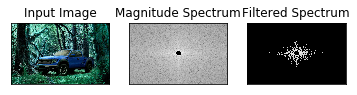

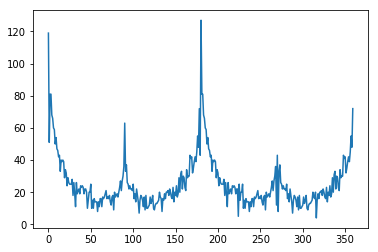

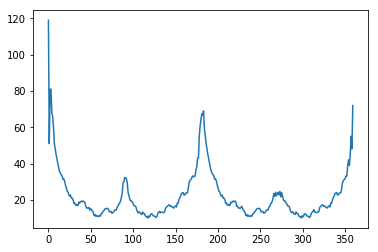

In [16]:
filename='features_test.csv'
exists = os.path.isfile(filename)
if exists:
    os.remove(filename) 
feature_extractor.extract_features_prediction('6095_Big-car-in-the-forest-the-powerful-Ford-Raptor.jpg')
data,predict_features,_=data_file_reader.file_reader(filename,'test')

Make Prediction based on the Transformed Data

In [17]:
lda_test_set = lda.transform(predict_features)
prediction=clf.predict(lda_test_set)
if prediction==0:
    print('The Image Contains a Natural Scene')
else:
    print('The Image Contains Man Made Objects in the Scene')

The Image Contains Man Made Objects in the Scene
